**Importing Necessary Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #PIL is a photo library from python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Downloading the dataset**

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 3s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

**Let's do some quick data Exploration**

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3815322974_52c12dbde3.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20078409301_aa8061bd0b_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5042785753_392cc4e74d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5955501969_e42f038a6f_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15495579081_661cb260d1_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4933823194_33f6e32c5a.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9484354480_07ff2ef0a6.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20905163782_312e2c3bda_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4625255191_26e17a28c9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9511172241_8aee411e2e.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/265450085_6e9f276e2e.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/23356825566_f5885875f2.jpg'),
 PosixP

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:7]

[PosixPath('datasets/flower_photos/roses/4061451210_1650590c6a.jpg'),
 PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg'),
 PosixPath('datasets/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5159317458_bbb22e2f65_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1757822526_fe30b9b3ca_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8035908422_87220425d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5083072098_81587295d5.jpg')]

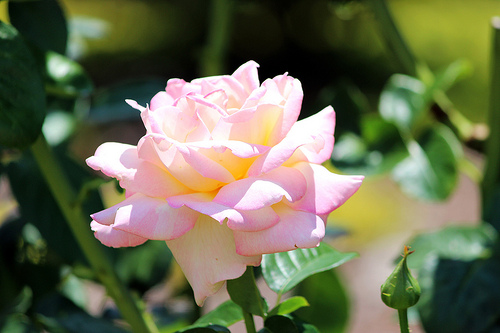

In [ ]:
PIL.Image.open(str(roses[1]))

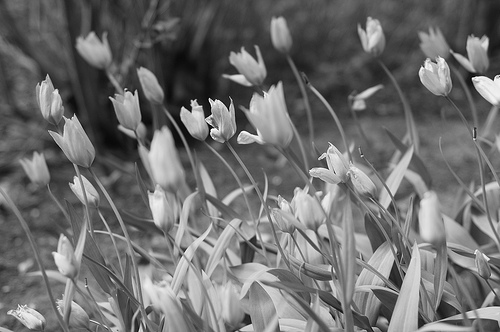

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

**Let us now create a dictionary which holds the types of flowers and their path**

In [ ]:
flower_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*'))
}

In [ ]:
flower_images_dict['sunflowers'][:7]

[PosixPath('datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3815322974_52c12dbde3.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20078409301_aa8061bd0b_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5042785753_392cc4e74d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5955501969_e42f038a6f_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15495579081_661cb260d1_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4933823194_33f6e32c5a.jpg')]

**Let us also now create a dictionary which holds the types of flowers and their number . Basically , a label dictionary**

In [ ]:
flowers_label_dict={
    'roses':0,
    'tulips':1,
    'daisy':2,
    'dandelion':3,
    'sunflowers':4,
}

In [ ]:
flowers_label_dict['daisy']

2

**Let us now convert these images into numpy array**

In [ ]:
flower_images_dict['roses'][1]

PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg')

In [ ]:
cv2.imread(flower_images_dict['roses'][1])

SystemError: ignored

Opencv only accepts path as a string so we have to convert into string

In [ ]:
img = cv2.imread(str(flower_images_dict['roses'][1]))
img

array([[[ 14,  67,  53],
        [ 24,  94,  64],
        [ 23, 104,  77],
        ...,
        [ 42, 140, 124],
        [ 43, 142, 124],
        [ 44, 143, 125]],

       [[ 21, 116,  95],
        [ 28, 130, 118],
        [ 23, 133, 121],
        ...,
        [ 45, 140, 133],
        [ 45, 142, 132],
        [ 45, 142, 132]],

       [[ 26, 139, 125],
        [ 35, 152, 151],
        [ 30, 147, 152],
        ...,
        [ 48, 144, 138],
        [ 46, 144, 138],
        [ 47, 145, 139]],

       ...,

       [[ 28,  45,  18],
        [ 31,  57,  27],
        [ 36,  68,  33],
        ...,
        [ 26,  26,  12],
        [ 27,  26,  12],
        [ 27,  27,  11]],

       [[ 31,  50,  23],
        [ 38,  65,  32],
        [ 41,  75,  38],
        ...,
        [ 27,  28,  12],
        [ 28,  28,  12],
        [ 27,  27,   9]],

       [[ 34,  53,  28],
        [ 40,  68,  38],
        [ 45,  82,  44],
        ...,
        [ 28,  29,  13],
        [ 29,  29,  11],
        [ 28,  28,  10]]

In [ ]:
img.shape

(333, 500, 3)

**Let us now resize the image**

In [ ]:
cv2.resize(img,(144,144)).shape

(144, 144, 3)

**Dividing the dataset into X and Y**

In [ ]:
for flower_name,images in flower_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
tulips
799
daisy
633
dandelion
898
sunflowers
699


In [ ]:
X,y = [],[]
for flower_name,images in flower_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(144,144))
    X.append(resized_img)
    y.append(flowers_label_dict[flower_name])

In [ ]:
X[7]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 3,  3,  3]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [16, 16, 16],
        [12, 12, 12],
        [10, 10, 10]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 2,  2,  2]]], dtype=uint8)

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
X = np.array(X)
y = np.array(y) 

**Now let us split the data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

In [ ]:
X_train.shape

(2752, 144, 144, 3)

In [ ]:
X_test.shape

(918, 144, 144, 3)

In [ ]:
y_train.shape

(2752,)

In [ ]:
y_test.shape

(918,)

**Scaling the data**

In [ ]:
X_train_scaled = X_train / 255
y_train_scaled = y_train / 255

In [ ]:
X_test_scaled = X_test / 255
y_test_scaled = y_test / 255

In [ ]:
X_train_scaled[3]

array([[[0.15294118, 0.28627451, 0.24705882],
        [0.15294118, 0.28627451, 0.24705882],
        [0.15686275, 0.28627451, 0.25882353],
        ...,
        [0.08235294, 0.34901961, 0.30588235],
        [0.08235294, 0.34901961, 0.30196078],
        [0.07843137, 0.34509804, 0.30196078]],

       [[0.16078431, 0.29411765, 0.25490196],
        [0.16078431, 0.29411765, 0.25490196],
        [0.16078431, 0.29019608, 0.2627451 ],
        ...,
        [0.0745098 , 0.34117647, 0.29803922],
        [0.07843137, 0.34509804, 0.30196078],
        [0.07843137, 0.34509804, 0.30196078]],

       [[0.16078431, 0.29411765, 0.25490196],
        [0.16078431, 0.29411765, 0.25490196],
        [0.16078431, 0.29019608, 0.2627451 ],
        ...,
        [0.07843137, 0.34509804, 0.30196078],
        [0.07843137, 0.34509804, 0.30196078],
        [0.07843137, 0.34509804, 0.30196078]],

       ...,

       [[0.14901961, 0.71372549, 0.69411765],
        [0.14117647, 0.70588235, 0.68627451],
        [0.14901961, 0

In [ ]:
model = Sequential([
                    layers.Conv2D(16,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),

                    layers.Dense(128,activation='relu'),
                    layers.Dense(256,activation='relu'),
                    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 53s 610ms/step - loss: 1.3725 - accuracy: 0.3863
Epoch 2/10
86/86 [==============================] - 51s 597ms/step - loss: 1.0678 - accuracy: 0.5618
Epoch 3/10
86/86 [==============================] - 52s 606ms/step - loss: 0.8769 - accuracy: 0.6464
Epoch 4/10
86/86 [==============================] - 52s 600ms/step - loss: 0.7030 - accuracy: 0.7235
Epoch 5/10
86/86 [==============================] - 52s 609ms/step - loss: 0.5045 - accuracy: 0.8096
Epoch 6/10
86/86 [==============================] - 52s 603ms/step - loss: 0.3551 - accuracy: 0.8768
Epoch 7/10
86/86 [==============================] - 53s 614ms/step - loss: 0.2142 - accuracy: 0.9273
Epoch 8/10
86/86 [==============================] - 52s 605ms/step - loss: 0.1009 - accuracy: 0.9717
Epoch 9/10
86/86 [==============================] - 53s 611ms/step - loss: 0.1066 - accuracy: 0.9618
Epoch 10/10
86/86 [==============================] - 53s 620ms/step - loss: 0.0720 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 181ms/step - loss: 1.9172 - accuracy: 0.6525


[1.9171791076660156, 0.6525054574012756]

**Looks like we have overfitting taking place here**

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[ 6.4463563e+00,  1.0208763e+01, -4.3735251e+00, -1.1104353e+01,
        -7.9468427e+00],
       [ 6.1085677e+00,  2.1485009e+00,  7.7736638e-03, -3.3272405e+00,
        -8.7504368e+00],
       [ 8.6367998e+00,  1.9135355e+00, -1.6424000e+00, -6.0174398e+00,
        -9.4339409e+00],
       ...,
       [-2.0257914e+00, -2.2512836e+00, -3.1773174e+00,  9.2330284e+00,
        -2.5349383e+00],
       [ 4.1738057e+00,  7.5816020e-02,  3.5607883e-01, -7.4197416e+00,
        -1.0176275e+00],
       [-2.6611798e+00, -2.7201324e+00, -3.3573348e-02,  3.6420610e+00,
         5.1096976e-01]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[2])
np.argmax(score)

0

In [ ]:
y_test[2]

2

As we can see it predicted daisy as rose


**Let's do some data augmentation**

In [ ]:
data_augmentation = keras.Sequential([
                  layers.experimental.preprocessing.RandomZoom(0.5),
])

Here I have used random zoom 

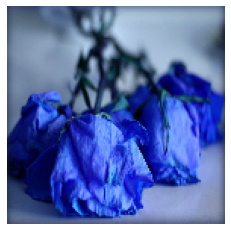

In [ ]:
plt.axis('off')
plt.imshow(X[0])

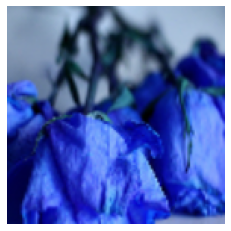

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Let's try random contrast now

In [ ]:
data_augmentation_1 = keras.Sequential([
                  layers.experimental.preprocessing.RandomContrast(0.5),
])

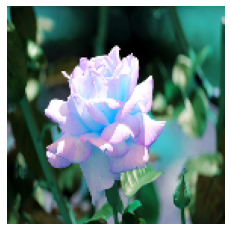

In [ ]:
plt.axis('off')
plt.imshow(X[1])

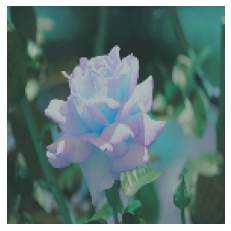

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation_1(X)[1].numpy().astype("uint8"))

Let's also try random rotate

In [ ]:
data_augmentation_2 = keras.Sequential([
                  layers.experimental.preprocessing.RandomRotation(0.45),
])

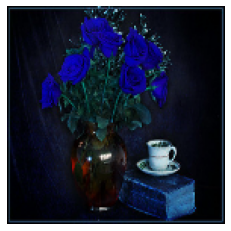

In [ ]:
plt.axis('off')
plt.imshow(X[2])

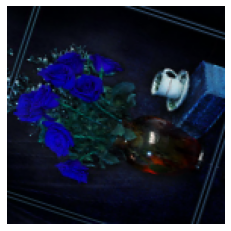

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation_2(X)[2].numpy().astype("uint8"))

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

**Now Let's train the model with these new changes**

In [ ]:
model = Sequential([
                    data_augmentation,
                    layers.Conv2D(16,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3,padding='same',activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.3),#dropout will drop 30% of neurons at random
                    layers.Flatten(),

                    layers.Dense(128,activation='relu'),
                    layers.Dense(256,activation='relu'),
                    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 62s 701ms/step - loss: 1.3820 - accuracy: 0.3732
Epoch 2/30
86/86 [==============================] - 60s 700ms/step - loss: 1.0984 - accuracy: 0.5494
Epoch 3/30
86/86 [==============================] - 60s 699ms/step - loss: 1.0154 - accuracy: 0.5698
Epoch 4/30
86/86 [==============================] - 60s 692ms/step - loss: 0.9331 - accuracy: 0.6214
Epoch 5/30
86/86 [==============================] - 60s 693ms/step - loss: 0.9057 - accuracy: 0.6381
Epoch 6/30
86/86 [==============================] - 60s 694ms/step - loss: 0.8603 - accuracy: 0.6490
Epoch 7/30
86/86 [==============================] - 60s 692ms/step - loss: 0.8624 - accuracy: 0.6526
Epoch 8/30
86/86 [==============================] - 60s 695ms/step - loss: 0.8069 - accuracy: 0.6788
Epoch 9/30
86/86 [==============================] - 59s 690ms/step - loss: 0.7980 - accuracy: 0.6748
Epoch 10/30
86/86 [==============================] - 60s 696ms/step - loss: 0.7684 - accura

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 6s 182ms/step - loss: 0.7141 - accuracy: 0.7418


[0.7141192555427551, 0.741830050945282]

**As we can see even though the training set accuracy went down when it  comes to test set accuracy went to 74%**

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

array([[ 2.3043523 ,  3.140906  , -0.54413795, -2.5752234 , -4.2834644 ],
       [ 3.7926638 ,  1.715153  , -0.7794455 , -2.966363  , -4.745666  ],
       [-0.6392582 , -1.769467  ,  7.160734  , -4.406161  , -3.7962725 ],
       ...,
       [-1.5068564 , -2.1353276 , -1.5740563 ,  2.767511  , -0.10790291],
       [ 1.2440177 ,  0.8195051 ,  0.7407704 , -2.5137162 , -1.5581659 ],
       [-0.92576665, -0.9251623 , -1.557772  ,  0.5204789 ,  1.6752247 ]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[2])
np.argmax(score)

2

In [ ]:
y_test[2]

2